<a href="https://colab.research.google.com/github/JonOnEarth/Bayesian-Neural-network/blob/master/BayesianNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# This is formatted as code
```

## Bayesian NN
you can check the github link: https://github.com/JonOnEarth/Bayesian-Neural-network/blob/master/BayesianNN.ipynb

or colab link: https://colab.research.google.com/drive/1VuCl_E8Q-lADV7plnUvcIUurosiC5KE1
### Papers
- This implementation and code based on the paper: weight uncertainty of Neural network

### Codes and contents are heavily inspired by
- https://github.com/cpark321/uncertainty-deep-learning
- https://joshfeldman.net/ml/2018/12/17/WeightUncertainty.html
- http://krasserm.github.io/2019/03/14/bayesian-neural-networks/
### Other code or tutorials
- https://github.com/krasserm/bayesian-machine-learning
- https://github.com/JavierAntoran/Bayesian-Neural-Networks
- https://github.com/nitarshan/bayes-by-backprop/blob/master/Weight%20Uncertainty%20in%20Neural%20Networks.ipynb

- https://paperswithcode.com/paper/weight-uncertainty-in-neural-networks

- https://github.com/anassinator/bnn



## What is Bayesian Neural network
Bayesian neural networks differ from plain neural networks in that their weights are assigned a probability distribution instead of a single value or point estimate.

These probability distributions describe the uncertainty in weights and can be used to estimate uncertainty in predictions.

We will train a bayesian nerual network via variational inference learns the parameters of these distributios instead of the weights directly.

![Classical NN VS BNN](https://sanjaykthakur.files.wordpress.com/2018/12/bayes_nn.png)

Left: each weight has a fixed value, as provided by classical backpropagation. Right: each weight is assigned a distribution, as provided by Bayes by Backprop



## Probabilistic model
A neural network can be viewed as probabilistic model $p(y|x,w)$. 
### MLE
Given a training dataset $D = (x^{(i)},y^{(i)})$ we can construct the likelihood function $p(\mathcal{D} \lvert \mathbf{w}) = \prod_i p(y^{(i)} \lvert \mathbf{x}^{(i)}, \mathbf{w})$ which is a fuction of parameters w. Maximizing the likelihood function gives the maximimum likelihood estimate (MLE) of $w$
$$
\begin{aligned} \mathbf{w}^{\mathrm{MLE}} &=\arg \max _{\mathbf{w}} \log P(\mathcal{D} | \mathbf{w}) \\ &=\arg \max _{\mathbf{w}} \sum_{i} \log P\left(\mathbf{y}_{i} | \mathbf{x}_{i}, \mathbf{w}\right) \end{aligned}
$$

### MAP
Multiplying the likelihood with a prior distribution p(w) is, by Bayes theorem, proportional to the posterior distribution $P(\mathbf{w} | \mathcal{D}) = P(\mathcal{D} | \mathbf{w})P(\mathbf{w})$. Maximizing $p(D|w)p(w)$ gives the maximum a posteriori (MAP) estimate of $w$. Computing the MAP estimate has a regularizing effect and can prevent overfitting. The optimization objectives here are the same as for MLE plus a regularization term coming from the log prior.

$$
\begin{aligned} \mathbf{w}^{\mathrm{MAP}} &=\arg \max _{\mathbf{w}} \log P(\mathbf{w} | \mathcal{D}) \\ &=\arg \max _{\mathbf{w}} \log P(\mathcal{D} | \mathbf{w})+\log P(\mathbf{w}) \end{aligned}
$$



## Variational inference

Unfortunately, an analytical solution for the posterior $p(w|d)$ in neural network is untractable. We therefore have to approximate the true posterior with a variational distribution $q(w|θ)$ of known functional form whose parameters we want to estimate. This can be done by minimizing the Kullback-Leibler divergence between $q(w|θ)$ and the true posterior $p(w|D)$ w.r.t. to $θ$.

$$
\begin{aligned} \theta^{\star} &=\arg \min _{\theta} \mathrm{KL}[q(\mathbf{w} | \theta) \| P(\mathbf{w} | \mathcal{D})] \\ &=\arg \min _{\theta} \int q(\mathbf{w} | \theta) \log \frac{q(\mathbf{w} | \theta)}{P(\mathbf{w}) P(\mathcal{D} | \mathbf{w})} \mathrm{d} \mathbf{w} \\ &=\arg \min _{\theta} \mathrm{KL}[q(\mathbf{w} | \theta) \| P(\mathbf{w})]-\mathbb{E}_{q(\mathbf{w} | \theta)}[\log P(\mathcal{D} | \mathbf{w})] \end{aligned}
$$

This is known as the variational free energy. The first term is the Kullback-Leibler divergence between the variational distribution q(w|θ) and the prior p(w) and is called the complexity cost. The second term is the expected value of the likelihood w.r.t. the variational distribution and is called the likelihood cost. By re-arranging the KL term, the cost function can also be written as
$$
\mathcal{F}(\mathcal{D},\boldsymbol{\theta}) = 
\mathbb{E}_{q(\mathbf{w} \lvert \boldsymbol{\theta})} \log q(\mathbf{w} \lvert \boldsymbol{\theta}) -
\mathbb{E}_{q(\mathbf{w} \lvert \boldsymbol{\theta})} \log p(\mathbf{w}) -
\mathbb{E}_{q(\mathbf{w} \lvert \boldsymbol{\theta})} \log p(\mathcal{D} \lvert \mathbf{w})
$$

We see that all three terms in equation are expectations w.r.t. the variational distribution $q(w|θ)$. The cost function can therefore be approximated by drawing samples $w(i)$ from $q(w|θ)$.
$$
\mathcal{F}(\mathcal{D},\boldsymbol{\theta}) \approx {1 \over N} \sum_{i=1}^N \left[
\log q(\mathbf{w}^{(i)} \lvert \boldsymbol{\theta}) -
\log p(\mathbf{w}^{(i)}) -
\log p(\mathcal{D} \lvert \mathbf{w}^{(i)})\right]
\tag 3
$$

In the following example, we’ll use a Gaussian distribution for the variational posterior, parameterized by θ=(μ,σ) where μ is the mean vector of the distribution and σ the standard deviation vector. The elements of σ are the elements of a diagonal covariance matrix which means that weights are assumed to be uncorrelated. Instead of parameterizing the neural network with weights w directly we parameterize it with μ and σ and therefore double the number of parameters compared to a plain neural network.

## Network training

A training iteration consists of a forward-propagate and and backward-progagate. During a forward pass a single sample is drawn from the variational posterior distribution. It is used to evaluate the approximate cost function defined by equation 3. The first two terms of the cost function are data-independent and can be evaluated layer-wise, the last term is data-dependent and is evaluated at the end of the forward-pass. During a backward-pass, gradients of $μ$ and $σ$ are calculated via backpropagation so that their values can be updated by an optimizer.

### Re-parameterization
Since a forward pass involves a stochastic sampling step we have to apply the so-called re-parameterization trick for backpropagation to work. The trick is to sample from a parameter-free distribution and then transform the sampled $ϵ$ with a deterministic function $t(μ,σ,ϵ)$ for which a gradient can be defined.  
Here, $ϵ$ is drawn from a standard normal distribution i.e. $ϵ∼N(0,I)$ and function $t(μ,σ,ϵ)=μ+σ⊙ϵ$ shifts the sample by mean μ and scales it with σ where $⊙$ is element-wise multiplication.

For numeric stability we will parameterize the network with $ρ$ instead of $σ$ directly and transform $ρ$ with the softplus function to obtain $σ=log(1+exp(ρ))$, so the $σ$ is always non-negative.  
Thus the transform from a sample of parameter-free noise and the variational posterior parameters that yields a posterior sample of the weights w is: 
$$
\mathbf{w}=t(\theta, \epsilon)=\mu+\log (1+\exp (\rho)) \circ \epsilon
$$
where $\circ$ is point-wise multiplication.

### Back propagation (Gradient Descent)
From above, let $\epsilon$ be a random variable having a probability density given by $q(\epsilon)$ and let $w = t(θ, \epsilon)$ where $t(θ, \epsilon)$ is a deterministic function. Suppose further that the marginal probability density of $w$, $q(w|θ)$, is such that $q(\epsilon)d\epsilon = q(w|θ)dw$. Then for a function f with derivatives in $w$:

$$
\begin{array}{l}{\frac{\partial}{\partial \theta} \mathbb{E}_{q(\mathbf{w} | \theta)}[f(\mathbf{w}, \theta)]=\mathbb{E}_{q(\epsilon)}\left[\frac{\partial f(\mathbf{w}, \theta)}{\partial \mathbf{w}} \frac{\partial \mathbf{w}}{\partial \theta}+\frac{\partial f(\mathbf{w}, \theta)}{\partial \theta}\right]} \end{array}\\
$$
Proof.
{\begin{aligned} \frac{\partial}{\partial \theta} \mathbb{E}_{q(\mathbf{w} | \theta)}[f(\mathbf{w}, \theta)] &=\frac{\partial}{\partial \theta} \int f(\mathbf{w}, \theta) q(\mathbf{w} | \theta) \mathrm{d} \mathbf{w} \\ &=\frac{\partial}{\partial \theta} \int f(\mathbf{w}, \theta) q(\epsilon) \mathrm{d} \epsilon \\ &=\mathbb{E}_{q(\epsilon)}\left[\frac{\partial f(\mathbf{w}, \theta)}{\partial \mathbf{w}} \frac{\partial \mathbf{w}}{\partial \theta}+\frac{\partial f(\mathbf{w}, \theta)}{\partial \theta}\right] \end{aligned}}

Then combined, each step of optimisation proceeds as fllows:

1. Sample $\epsilon ~ N(0, I)$
2. let $w = \mu+\log (1+\exp (\rho)) \circ \epsilon$
3. Let $\theta = (\mu,\rho)$ .
4. Let $f(w,\theta) = log q(w|\theta) -logP(w)P(D|w)$.
5. Calculate the gradient with respect to the mean
$$
\Delta_{\mu}=\frac{\partial f(\mathbf{w}, \theta)}{\partial \mathbf{w}}+\frac{\partial f(\mathbf{w}, \theta)}{\partial \mu}
$$
6. Calculate the gradient with respect to the standard deviation parameter $ρ$
$$
\Delta_{\rho}=\frac{\partial f(\mathbf{w}, \theta)}{\partial \mathbf{w}} \frac{\epsilon}{1+\exp (-\rho)}+\frac{\partial f(\mathbf{w}, \theta)}{\partial \rho}
$$
7. Update the variational parameters:
$$
\begin{array}{l}{\mu \leftarrow \mu-\alpha \Delta_{\mu}} \\ {\rho \leftarrow \rho-\alpha \Delta_{\rho}}\end{array}
$$





## Implementation example

Unlike the easy example or tutorials shown, only 1 dimension dataset was shown. Here I am use multiple dimension dataset to do a regression problems.

This dataset is from my research, which is indoor positioning dataset. 
The Received Signal strength(RSS value) as y out, and locations as input x. We are trying to using the position to predict the RSS filed. 


In [0]:
import torch
print(torch.__version__)
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.distributions import Normal
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly
print(plotly.__version__)

1.3.1
4.1.1


In [0]:
# load the dataset
X = np.loadtxt('pos_train.csv', delimiter=',')
y = np.loadtxt('rss_train.csv', delimiter=',')
X_test = np.loadtxt('pos_rand.csv', delimiter=',')
y_test = np.loadtxt('rss_rand.csv', delimiter=',')
input_dim = X.shape[1]
output_dim = y.shape[1]

In [0]:
# numpy to tensor
train_x = torch.from_numpy(X).float()
train_y = torch.from_numpy(y).float()
test_x = torch.from_numpy(X_test).float()
test_y = torch.from_numpy(y_test).float()

In [0]:
train_x.type()

'torch.FloatTensor'

In [0]:
# The dataset filed visulization
X_real = train_x.detach().numpy()
y_real = train_y.detach().numpy()
fig = go.Figure(data=[go.Scatter3d(x = X_real[:,0], y = X_real[:,1], z = y_real[:,1], mode='markers', marker=dict(
        size=6,
        color = y_real[:,1],                # set color to an array/list of desired values
        colorscale='delta',   # choose a colorscale
        opacity=0.8
    ))])
fig.show()

In [0]:
# Tranfer the data into the batch data
from torch.utils.data import TensorDataset
train_data = TensorDataset(train_x, train_y)
test_data = TensorDataset(test_x, test_y)
batch_size_train = 32
batch_size_test = 32
train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size_train, shuffle=True)
test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size_test, shuffle=True)

## Standard_MLP

First, we are using the standard Neural network.




In [0]:
from mlp import *

In [0]:
# parameters for neural network
layer_wid1 = [16,32,128,64,16,output_dim]
nonlinearity1 = 'relu'
stand_net=Net(input_dim, layer_wid1, nonlinearity1)

In [0]:
optimizer1 = optim.Adam(stand_net.parameters(),lr=0.001,weight_decay = 1e-5)

In [0]:
# training
epochs1 = 2000
for epoch in range(epochs1):  # loop over the dataset multiple times
  losses, mses = [], []
  for batch, (x_train,y_train) in enumerate(train_loader):
    optimizer1.zero_grad()
    # forward + backward + optimize
    y_pred = stand_net(x_train)
    loss = stand_net.criterion(y_pred, y_train)
    loss.backward()
    optimizer1.step()

    # output_train = bnet(x_train)
    # train_mse = F.mse_loss(y_train, output_train)
    # mses.append(train_mse.item())
    losses.append(loss.item())
  
  train_loss = np.mean(losses)
  # epoch_mse = np.mean(mses)
  if epoch % 100 == 0:
    print('epoch: {}/{}'.format(epoch+1,epochs1))
    print(f'epoch{epoch}, train_loss^mse:{train_loss}')

  test_losses, test_mses = [], []
  for i, (x_test, y_test) in enumerate(test_loader):
      # test_loss = bnet.sample_elbo(x_test, y_test, 5)
      test_pred = stand_net(x_test)
      test_mse = F.mse_loss(y_test, test_pred)
      # test_losses.append(test_loss.item())
      test_mses.append(test_mse.item())

  # test_loss = np.mean(test_losses)
  epoch_mse_test =  np.mean(test_mses)
  if epoch % 100 == 0:
    print('epoch: {}/{}'.format(epoch+1,epochs1))
    print(f'epoch_mse_test_loss:{epoch_mse_test}')
print('Finished Training')

epoch: 1/2000
epoch0, train_loss^mse:6922.080437155331
epoch: 1/2000
epoch_mse_test_loss:6054.784469604492
epoch: 101/2000
epoch100, train_loss^mse:18.602494464201087
epoch: 101/2000
epoch_mse_test_loss:19.31205326318741
epoch: 201/2000
epoch200, train_loss^mse:5.412386817090652
epoch: 201/2000
epoch_mse_test_loss:5.773011438548565
epoch: 301/2000
epoch300, train_loss^mse:4.454936465796302
epoch: 301/2000
epoch_mse_test_loss:4.153872765600681
epoch: 401/2000
epoch400, train_loss^mse:2.565233076319975
epoch: 401/2000
epoch_mse_test_loss:2.547386534512043
epoch: 501/2000
epoch500, train_loss^mse:1.9160785885418163
epoch: 501/2000
epoch_mse_test_loss:2.207970429211855
epoch: 601/2000
epoch600, train_loss^mse:1.5793781876564026
epoch: 601/2000
epoch_mse_test_loss:1.9743670672178268
epoch: 701/2000
epoch700, train_loss^mse:1.521827732815462
epoch: 701/2000
epoch_mse_test_loss:1.8401612844318151
epoch: 801/2000
epoch800, train_loss^mse:1.3505019054693335
epoch: 801/2000
epoch_mse_test_loss:1

In [0]:
# Show the training dataset absolute prediction error.
Y = stand_net(train_x)
y_error = torch.abs(Y - train_y)
X_adam = train_x.detach().numpy()
y_error = y_error.detach().numpy()
fig = go.Figure(data=[go.Scatter3d(x=X_adam[:,0], y=X_adam[:,1], z=y_error[:,1], mode='markers', marker=dict(
        size=6,
        color=y_error[:,1],                # set color to an array/list of desired values
        colorscale='delta',   # choose a colorscale
        opacity=0.8
    ))])
fig.show()

## Bayesian Neural Networks

In [0]:
from bayesianNN import *

In [0]:
# Bayesian Neural network
layer_wid2 = [1024,output_dim]
nonlinearity2 =  'relu'
bnet = MLP_BBB(input_dim,layer_wid2, nonlinearity2, noise_tol = 0.1, prior_var=1)

### Parameters adjustment
**Noise_tol** is very important for the result. As noise tolerance is the covariance we set for the likelihood $P(D|w)$. if noise tolerance is big, that mean we tolerate the big error between real output and prediction. In opposite, samll noise tolerance mean we can't tolerate a big mistake for our prediction. That will give us some trade-off, too samll maybe overfitting, too big maybe underfitting. 

In [0]:
optimizer2 = optim.Adam(bnet.parameters(), lr=.01, weight_decay = 1e-5)

In [0]:
# bayesian neural network training
epochs2 = 2000
for epoch in range(epochs2):  # loop over the dataset multiple times
  losses, mses = [], []
  for batch, (x_train,y_train) in enumerate(train_loader):
    optimizer2.zero_grad()
    # forward + backward + optimize
    loss = bnet.sample_elbo(x_train, y_train, 10)
    loss.backward()
    optimizer2.step()

    output_train = bnet(x_train)
    train_mse = F.mse_loss(y_train, output_train)
    mses.append(train_mse.item())
    losses.append(loss.item())
  
  train_loss = np.mean(losses)
  epoch_mse = np.mean(mses)
  if epoch % 100 == 0:
    print('epoch: {}/{}'.format(epoch+1,epochs2))
    print(f'epoch{epoch}, train_loss:{train_loss}, epoch_mse:{epoch_mse}')

  test_losses, test_mses = [], []
  for i, (x_test, y_test) in enumerate(test_loader):
      test_loss = bnet.sample_elbo(x_test, y_test, 5)
      test_pred = bnet(x_test)
      test_mse = F.mse_loss(y_test, test_pred)
      test_losses.append(test_loss.item())
      test_mses.append(test_mse.item())

  test_loss = np.mean(test_losses)
  epoch_mse_test =  np.mean(test_mses)
  if epoch % 100 == 0:
    print('epoch: {}/{}'.format(epoch+1,epochs2))
    print(f'test_loss:{test_loss}, epoch_mse_test:{epoch_mse_test}')
print('Finished Training')

epoch: 1/2000
epoch0, train_loss:29230656.588235293, epoch_mse:2477.111166561351
epoch: 1/2000
test_loss:16656606.9765625, epoch_mse_test:1498.0246810913086
epoch: 101/2000
epoch100, train_loss:89718.65165441176, epoch_mse:6.268639115726247
epoch: 101/2000
test_loss:96636.04443359375, epoch_mse_test:7.122472286224365
epoch: 201/2000
epoch200, train_loss:51191.38671875, epoch_mse:3.1722595376126907
epoch: 201/2000
test_loss:54275.28497314453, epoch_mse_test:3.51962872967124
epoch: 301/2000
epoch300, train_loss:31372.83674172794, epoch_mse:1.5185675919055939
epoch: 301/2000
test_loss:30435.562072753906, epoch_mse_test:1.5843053609132767
epoch: 401/2000
epoch400, train_loss:23764.744399126837, epoch_mse:1.2661514440003563
epoch: 401/2000
test_loss:30822.393524169922, epoch_mse_test:2.05694667622447
epoch: 501/2000
epoch500, train_loss:24574.12126608456, epoch_mse:1.3643891601001514
epoch: 501/2000
test_loss:36488.59408569336, epoch_mse_test:2.6360652931034565
epoch: 601/2000
epoch600, tra

In [0]:
# %debug

In [0]:
# The prediction error
Y2 = bnet(train_x)
y_error2 = torch.abs(Y2 - train_y)
X_bnet = train_x.detach().numpy()
y_error2 = y_error2.detach().numpy()
fig = go.Figure(data=[go.Scatter3d(x=X_bnet[:,0], y=X_bnet[:,1], z=y_error2[:,1], mode='markers', marker=dict(
        size=6,
        color=y_error2[:,1],                # set color to an array/list of desired values
        colorscale='delta',   # choose a colorscale
        opacity=0.8
    ))])
fig.show()

### Result
Bayesian neural network(BNN) training result is similar to regular neural network training, but it takes much more time for BNN to train. The benefits for BNN to trian is that it can give us the distribution of the prediction as we discuss before. Let's see the result.    

The trianing is a little bit of overfitting. So you can see sample 1000 data points, all prediction will locate around the mean value closely.   

But at the edge of the dataset area, the confidence is very low than the other  area of datasets. That mean few dataset at the area, we can't have a very confindent prediction. Unlike the regular neural network, they will only give the fix prediction value no matter the confindence.



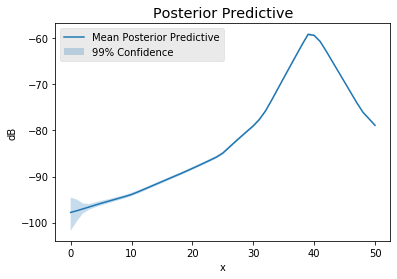

In [0]:

# samples is the number of "predictions" we make for 1 x-value
samples = 1000

y_samp = np.zeros((samples,train_y.shape[0],train_y.shape[1]))
for s in range(samples):
    y_tmp = bnet(train_x).detach().numpy()
    y_samp[s] = y_tmp#-train_y.detach().numpy()
trainx1 = train_x.numpy()[:,1]
index = np.where(trainx1 == 16)
trainx2 = train_x[:,0]
x_tmp = trainx2[index]
y_samp1 = y_samp[:,index,1].reshape(samples,-1)
plt.plot(x_tmp, np.mean(y_samp1, axis = 0), label='Mean Posterior Predictive')
plt.style.use('ggplot')
plt.fill_between(x_tmp.numpy().reshape(-1), np.percentile(y_samp1, 1, axis = 0), np.percentile(y_samp1, 99, axis = 0), alpha = 0.25, label='99% Confidence')
# plt.ylim(-100,-80)
plt.xlabel('x')
plt.ylabel('dB')
plt.legend()
plt.title('Posterior Predictive')
plt.show()

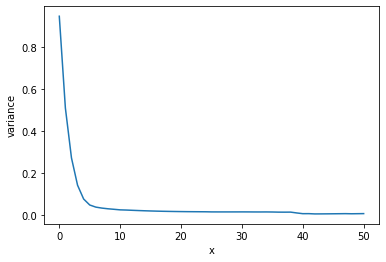

In [0]:
# The variance of the prediction at each location of x where y is a fixed value
y_var = np.var(y_samp1, axis = 0)
plt.plot(x_tmp, y_var)
plt.xlabel('x')
plt.ylabel('variance')
plt.show()